In [5]:
from keras.datasets import boston_housing

# (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

* normalizing the data
* then build tensormodel
* then try to overfit
* then try to compensate for the overfitting

* do a normalization with respect to each feature
* use the same std and mean of the training data on the test data to normalize to avoid information leaking

In [8]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean #broadcasting, great property from numpy
# zero-centering 
std=train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

print("min: ", np.min(train_data, axis=0))
print("mean: ", np.mean(train_data, axis=0))
print("std: ", np.std(train_data, axis=0))
print("min: ", np.min(train_data, axis=0))


min:  [-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]
mean:  [-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]
std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
min:  [-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]


In [9]:
column_names = ["Per capita crime rate", "The proportion of residential land zoned for lots over 25000 square feet", "The proportion of non-retail business acres per town", "Charles River dummy variable", "Nitric oxides concentration (parts per 10 million)", "The average number of rooms per dwelling", "The proportion of owner-occupied units built before 1940", "Weighted distances to five Boston employment centers", "Index of accessibility to radial highways", "Full-value property-tax rate per 10000", "Pupil-teacher ratio by town", "1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town", "Percentage lower status of the population"]
print(column_names)

['Per capita crime rate', 'The proportion of residential land zoned for lots over 25000 square feet', 'The proportion of non-retail business acres per town', 'Charles River dummy variable', 'Nitric oxides concentration (parts per 10 million)', 'The average number of rooms per dwelling', 'The proportion of owner-occupied units built before 1940', 'Weighted distances to five Boston employment centers', 'Index of accessibility to radial highways', 'Full-value property-tax rate per 10000', 'Pupil-teacher ratio by town', '1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town', 'Percentage lower status of the population']


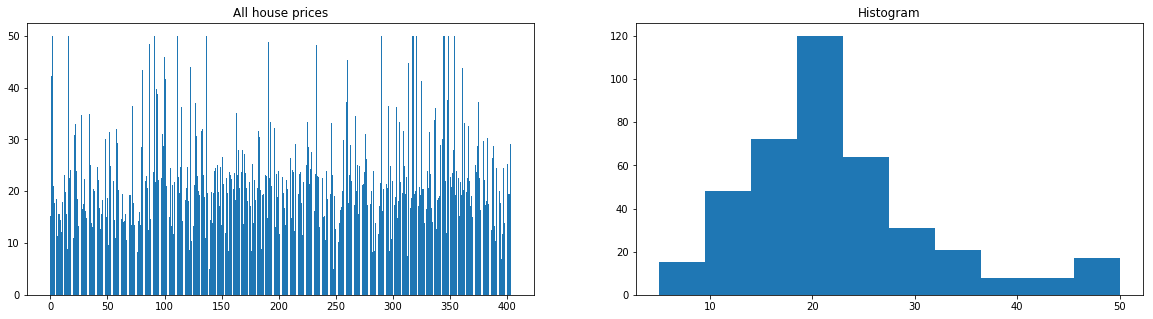

In [10]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(range(404), train_targets)
plt.title("All house prices")

plt.subplot(1, 2, 2)
plt.hist(train_targets);
plt.title("Histogram")

plt.show();

## K-Fold Cross Validation

* 404 (number of samples ) = 4\*101  
* Let's try 4-Fold cross validation

In [11]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) #since 64 > 13, the nueral network will make artificial new features
    model.add(layers.Dense(64, activation='relu')) #since 64 > 13, the nueral network will make artificial new features
    model.add(layers.Dense(1))
    
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=['mae']
    )
    return model

test_model = build_model()
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
k=4
num_val_samples = len(train_data) //k
num_epochs = 500
all_scores =[]
all_history =[]
all_models =[]

for i in range(k):
    print("Fold: ", str(i+1))
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    
    val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
    
    train_data_left= train_data[0:i*num_val_samples]
    
    train_data_right= train_data[(i+1)*num_val_samples:]
        
    train_targets_left= train_targets[0:i*num_val_samples]
    
    train_targets_right= train_targets[(i+1)*num_val_samples:]
    
    partial_train_data=np.concatenate(
        [train_data_left, train_data_right],
         axis=0 #0 axis is always the samples dimension
    ) 
    partial_train_targets=np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )
    model=build_model()
    history=model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )
    model.save(str(i+1) + "-model.h5")
    val_mse, val_mae =model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    all_history.append(history)
    all_models.append(model)

Fold:  1
101/101 [==============================] - 0s 952us/step
Fold:  2
101/101 [==============================] - 0s 1ms/step
Fold:  3
101/101 [==============================] - 0s 1ms/step
Fold:  4
101/101 [==============================] - 0s 1ms/step


In [15]:
print(all_scores)

[1.9620533390800552, 2.543269936401065, 2.5164416450085025, 2.9362191917872664]


In [17]:
all_history

In [20]:
history_one = all_history[0]

In [21]:
history_one.history

{'loss': [184.8005618874065,
  26.476496714657753,
  20.178263053431138,
  18.222769283562975,
  15.774851096761747,
  15.53617382800771,
  14.150677627743423,
  14.092259366466678,
  13.365433299695232,
  12.728850197730623,
  12.159134954147437,
  12.115462818028504,
  11.9553534659875,
  11.350916007038148,
  10.847160383418007,
  11.12740765699349,
  10.669416061308613,
  11.063139541865336,
  10.918131940487715,
  10.589002502133448,
  10.573823933222595,
  10.337117335277593,
  9.605534469129521,
  9.749936377569894,
  9.77740971875077,
  9.475705211733969,
  9.40512078750742,
  9.492012209599816,
  9.222538381301714,
  9.280039238372867,
  8.679618797786894,
  9.14213214974201,
  8.436414251447864,
  8.78221174602346,
  9.24696404099361,
  8.850820356840547,
  8.354920231377577,
  8.470739984161922,
  8.223375972905252,
  8.107072429246857,
  7.7051919749149,
  8.143535634602856,
  7.909058768148903,
  7.791842883525304,
  7.802678914006843,
  7.201027730680682,
  7.387242422695

In [22]:
print(all_scores)

[2.709266648434176, 3.1600742953838687, 2.660308082505028, 2.7849366216376277]


In [23]:
print(all_models)

[<keras.engine.sequential.Sequential object at 0x7f73251f85c0>, <keras.engine.sequential.Sequential object at 0x7f7325723940>, <keras.engine.sequential.Sequential object at 0x7f7359c5b240>, <keras.engine.sequential.Sequential object at 0x7f7324cfe748>]


In [24]:
optimal_model = all_models[2]

In [25]:
optimal_history = all_history[2]

/home/mathlizard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


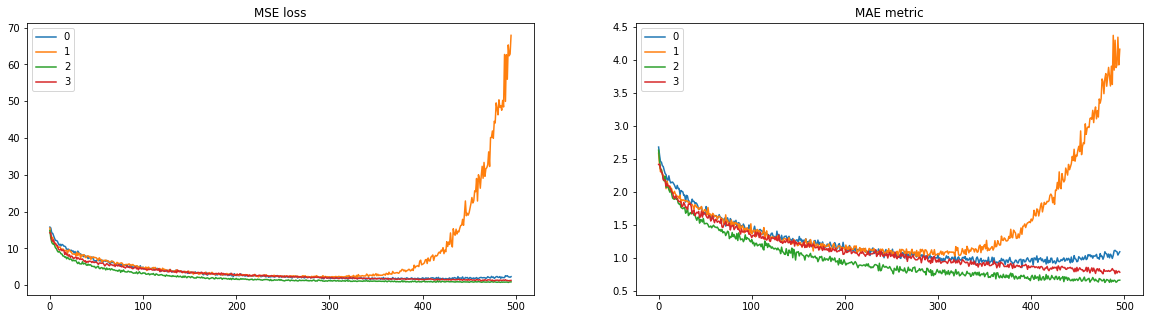

In [39]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_history):


    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'][4:], label=str(i))
    plt.legend()
    plt.title("MSE loss")
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'][4:], label=str(i));
    plt.title("MAE metric")

plt.legend()
plt.show();

dict_items([('loss', [184.8005618874065, 26.476496714657753, 20.178263053431138, 18.222769283562975, 15.774851096761747, 15.53617382800771, 14.150677627743423, 14.092259366466678, 13.365433299695232, 12.728850197730623, 12.159134954147437, 12.115462818028504, 11.9553534659875, 11.350916007038148, 10.847160383418007, 11.12740765699349, 10.669416061308613, 11.063139541865336, 10.918131940487715, 10.589002502133448, 10.573823933222595, 10.337117335277593, 9.605534469129521, 9.749936377569894, 9.77740971875077, 9.475705211733969, 9.40512078750742, 9.492012209599816, 9.222538381301714, 9.280039238372867, 8.679618797786894, 9.14213214974201, 8.436414251447864, 8.78221174602346, 9.24696404099361, 8.850820356840547, 8.354920231377577, 8.470739984161922, 8.223375972905252, 8.107072429246857, 7.7051919749149, 8.143535634602856, 7.909058768148903, 7.791842883525304, 7.802678914006843, 7.201027730680682, 7.3872424226952935, 7.401685171219857, 7.339787586392734, 7.655262007139748, 7.429276670246728

In [40]:
all_scores

[2.709266648434176, 3.1600742953838687, 2.660308082505028, 2.7849366216376277]

In [43]:
k=4
num_val_samples = len(train_data) //k
num_epochs = 100
all_scores =[]
all_history =[]
all_models =[]

for i in range(k):
    print("Fold: ", str(i+1))
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    
    val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
    
    train_data_left= train_data[0:i*num_val_samples]
    
    train_data_right= train_data[(i+1)*num_val_samples:]
        
    train_targets_left= train_targets[0:i*num_val_samples]
    
    train_targets_right= train_targets[(i+1)*num_val_samples:]
    
    partial_train_data=np.concatenate(
        [train_data_left, train_data_right],
         axis=0 #0 axis is always the samples dimension
    ) 
    partial_train_targets=np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )
    model=build_model()
    history=model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
        validation_data=(val_data, val_targets)
    )
    model.save(str(i+1) + "-model.h5")
    val_mse, val_mae =model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    all_history.append(history)
    all_models.append(model)

Fold:  1
101/101 [==============================] - 0s 116us/step
Fold:  2
101/101 [==============================] - 0s 107us/step
Fold:  3
101/101 [==============================] - 0s 101us/step
Fold:  4
101/101 [==============================] - 0s 112us/step


<Figure size 1440x360 with 0 Axes>

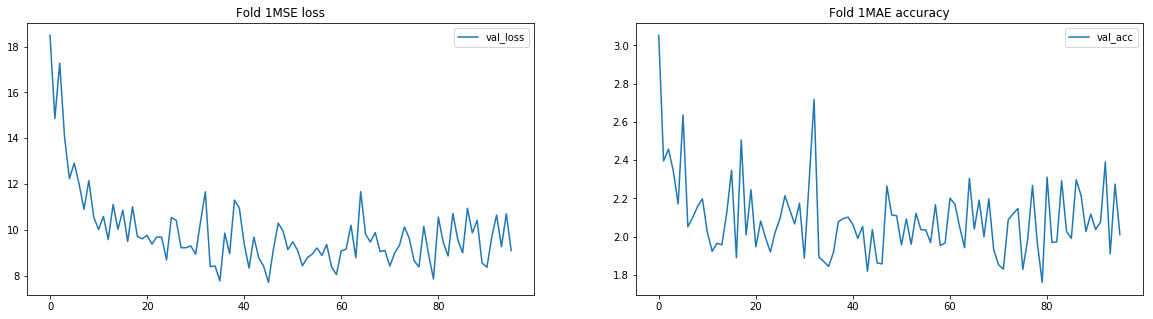

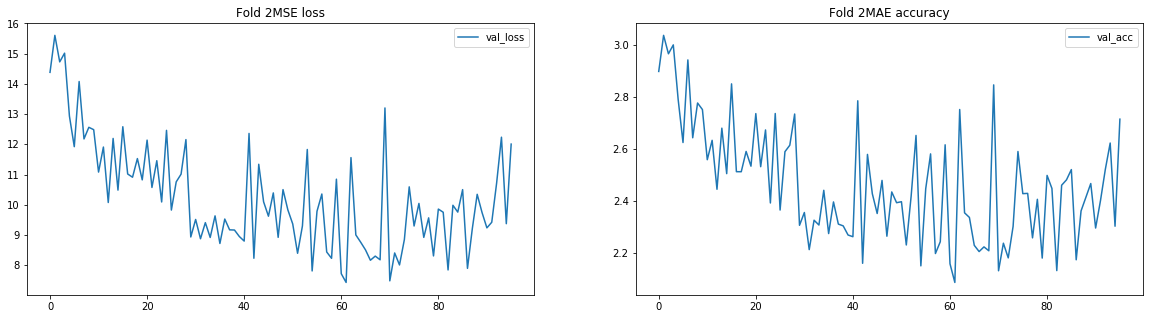

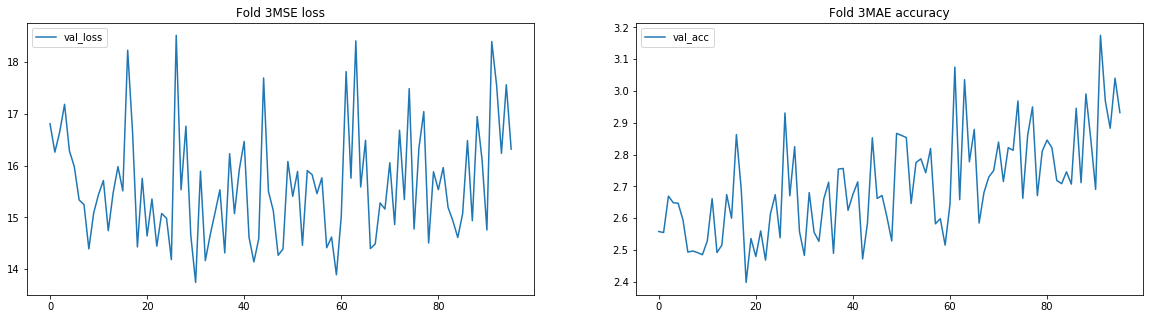

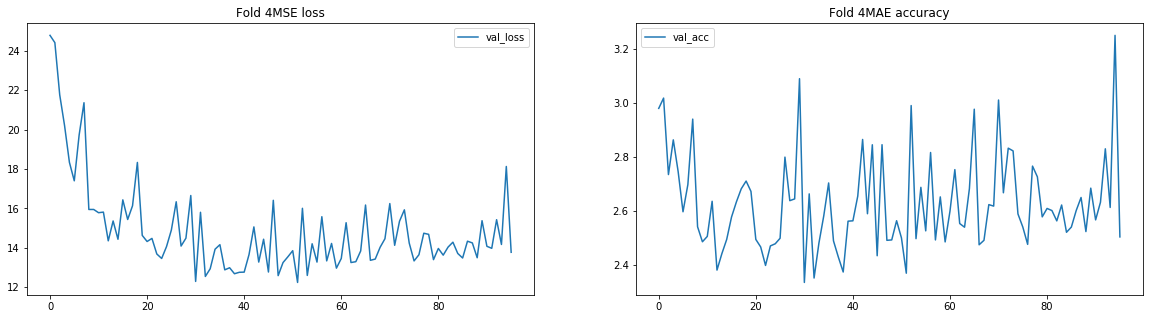

In [55]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_history):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'][4:], label="loss")
    plt.plot(history.history['val_loss'][4:], label="val_loss")
    plt.legend()
    plt.title("Fold " + str(i + 1) + "MSE loss")

    plt.subplot(1, 2, 2)
#     plt.plot(history.history['mean_absolute_error'][4:], label="acc");
    plt.plot(history.history['val_mean_absolute_error'][4:], label="val_acc");
    plt.title("Fold " + str(i + 1) + "MAE accuracy")
    plt.legend()
    plt.show();

#plt.legend()
#plt.show();

In [47]:
for i in all_history:
    print(i.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


/home/mathlizard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


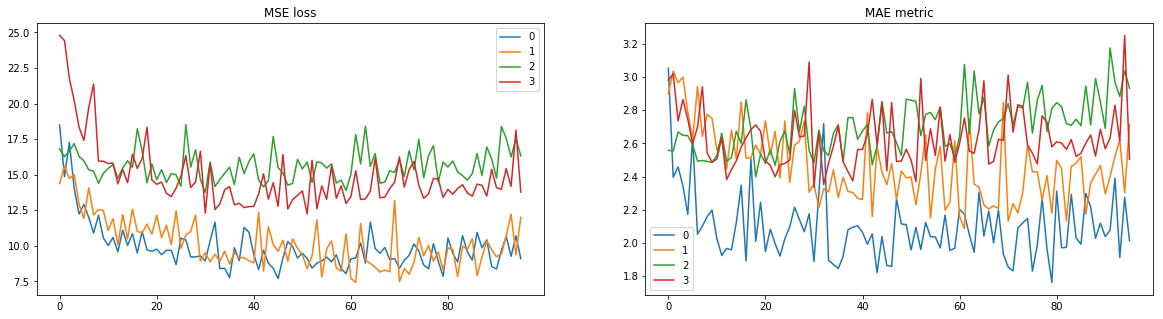

In [56]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_history):


    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'][4:], label=str(i))
    plt.legend()
    plt.title("MSE loss")
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_mean_absolute_error'][4:], label=str(i));
    plt.title("MAE metric")

plt.legend()
plt.show();

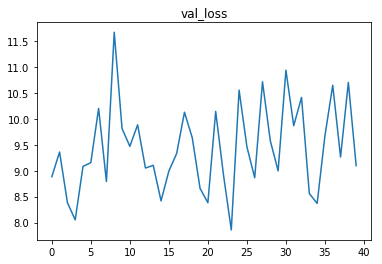

No handles with labels found to put in legend.


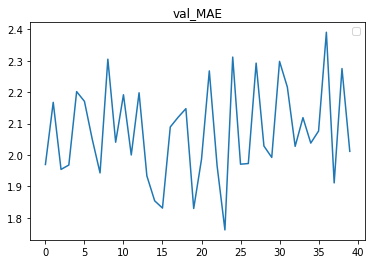

In [60]:
optimal_epoch = all_history[0]

plt.plot(optimal_epoch.history['val_loss'][60:])
plt.title('val_loss')
plt.show()
plt.plot(optimal_epoch.history['val_mean_absolute_error'][60:])
plt.title('val_MAE')

plt.show()

In [61]:
k=4
num_val_samples = len(train_data) //k
num_epochs = 83
all_scores =[]
all_history =[]
all_models =[]

for i in range(k):
    print("Fold: ", str(i+1))
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    
    val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
    
    train_data_left= train_data[0:i*num_val_samples]
    
    train_data_right= train_data[(i+1)*num_val_samples:]
        
    train_targets_left= train_targets[0:i*num_val_samples]
    
    train_targets_right= train_targets[(i+1)*num_val_samples:]
    
    partial_train_data=np.concatenate(
        [train_data_left, train_data_right],
         axis=0 #0 axis is always the samples dimension
    ) 
    partial_train_targets=np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )
    model=build_model()
    history=model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
        validation_data=(val_data, val_targets)
    )
    model.save(str(i+1) + "-model.h5")
    val_mse, val_mae =model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    all_history.append(history)
    all_models.append(model)

Fold:  1
101/101 [==============================] - 0s 106us/step
Fold:  2
101/101 [==============================] - 0s 106us/step
Fold:  3
101/101 [==============================] - 0s 111us/step
Fold:  4
101/101 [==============================] - 0s 84us/step


In [62]:
all_scores

[2.0163676195805618, 2.211481750601589, 2.611668801543736, 2.433756460057627]

In [63]:
val_mae

2.433756460057627

/home/mathlizard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


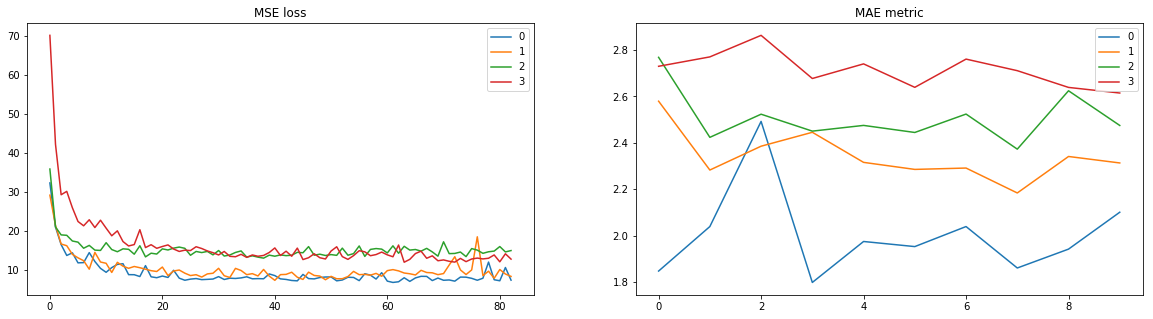

In [66]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_history):


    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label=str(i))
    plt.legend()
    plt.title("MSE loss")
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_mean_absolute_error'][20:30], label=str(i));
    plt.title("MAE metric")

plt.legend()
plt.show();

In [67]:
k=4
num_val_samples = len(train_data) //k
num_epochs = 23
all_scores =[]
all_history =[]
all_models =[]

for i in range(k):
    print("Fold: ", str(i+1))
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    
    val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
    
    train_data_left= train_data[0:i*num_val_samples]
    
    train_data_right= train_data[(i+1)*num_val_samples:]
        
    train_targets_left= train_targets[0:i*num_val_samples]
    
    train_targets_right= train_targets[(i+1)*num_val_samples:]
    
    partial_train_data=np.concatenate(
        [train_data_left, train_data_right],
         axis=0 #0 axis is always the samples dimension
    ) 
    partial_train_targets=np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )
    model=build_model()
    history=model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0,
        validation_data=(val_data, val_targets)
    )
    model.save(str(i+1) + "-model.h5")
    val_mse, val_mae =model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    all_history.append(history)
    all_models.append(model)

Fold:  1
101/101 [==============================] - 0s 98us/step
Fold:  2
101/101 [==============================] - 0s 118us/step
Fold:  3
101/101 [==============================] - 0s 112us/step
Fold:  4
101/101 [==============================] - 0s 126us/step


/home/mathlizard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


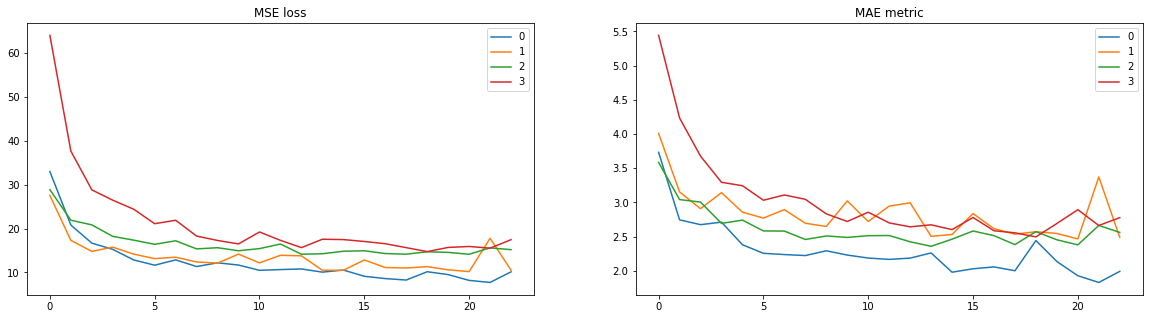

In [68]:
plt.figure(figsize=(20, 5))
for i, history in enumerate(all_history):


    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label=str(i))
    plt.legend()
    plt.title("MSE loss")
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_mean_absolute_error'], label=str(i));
    plt.title("MAE metric")

plt.legend()
plt.show();

In [69]:
model_one=models.load_model("1-model.h5")

In [71]:
model_one.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


[18.666070227529488, 2.85670290741266]

In [74]:
model_two=models.load_model("2-model.h5")

In [75]:
model_two.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


[19.15780310537301, 2.804945328656365]